# Overfitting and regularization
### This part has solution to question 6 and question 7

Jiatong Hao &nbsp; U42186937
<br>Xianhui Li &nbsp; U16207086

In [66]:
# Import Python libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Netural network


In [67]:
class LogisticRegression:
    """
    Implements a Logistic Regression Classifier.
    """
    
    def __init__(self, input_dim, output_dim, hidden_dim, L2Reg):
        """
        Initializes the parameters of the logistic regression classifer to 
        random values.
        
        args:
            input_dim: Number of dimensions of the input data
            output_dim: Number of classes
            hidden_dim: Number of hidden nodes
        """
        
        self.theta1 = np.random.randn(input_dim, hidden_dim) / np.sqrt(input_dim)       
        self.bias1 = np.zeros((1, hidden_dim))
        
        self.theta2 = np.random.randn(hidden_dim, output_dim) / np.sqrt(hidden_dim) 
        self.bias2 = np.zeros((1, output_dim))
        
        self.L2Reg=L2Reg
        
        
    #--------------------------------------------------------------------------
    
    def compute_cost(self,X, y):
        """
        Computes the total cost on the dataset.
        
        args:
            X: Data array
            y: Labels corresponding to input data
        
        returns:
            cost: average cost per data sample
        """
        num_examples = np.shape(X)[0]
        z = np.dot(X,self.theta1) + self.bias1
        a = np.tanh(z)
        z2 = np.dot(a, self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        
        one_hot_y = np.zeros((num_examples,np.max(y)+1))
        logloss = np.zeros((num_examples,))        
        for i in range(np.shape(X)[0]):
            one_hot_y[i,y[i]] = 1
            logloss[i] = -np.sum(np.log(softmax_scores[i,:]) * one_hot_y[i,:])
        data_loss = np.sum(logloss)
        data_loss += self.L2Reg/2 * (np.sum(np.square(self.theta2)) + np.sum(np.square(self.theta1)))
        
        return 1./num_examples * data_loss

    
    #--------------------------------------------------------------------------
 
    def predict(self,X):
        """
        Makes a prediction based on current model parameters.
        
        args:
            X: Data array
            
        returns:
            predictions: array of predicted labels
        """
        z = np.dot(X,self.theta1) + self.bias1
        a = np.tanh(z)
        z2 = np.dot(a, self.theta2) + self.bias2
        exp_z2 = np.exp(z2)
        softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)
        predictions = np.argmax(softmax_scores, axis = 1)
        return predictions
        
    #--------------------------------------------------------------------------
   
    def fit(self,X,y,num_epochs,lr=0.01):
    
        #Learns model parameters to fit the data.
     
        
        for epoch in range(0, num_epochs):

            # Forward propagation
            z = np.dot(X, self.theta1) + self.bias1
            a = np.tanh(z)
            z2 = np.dot(a, self.theta2) + self.bias2
            exp_z2 = np.exp(z2)
            softmax_scores = exp_z2 / np.sum(exp_z2, axis=1, keepdims=True)          
                                                                       
                                                                                            
            # Backpropagation
            beta = np.zeros_like(softmax_scores)           
            one_hot_y = np.zeros_like(softmax_scores)      
            for i in range(X.shape[0]):
                one_hot_y[i, y[i]] = 1
            beta2 = softmax_scores - one_hot_y    
                                       
            
            
            # Compute gradients of model parameters
            dtheta2 = np.dot(a.T, beta2)
            dbias2 = np.sum(beta2, axis = 0, keepdims=True)
            
            beta = np.dot(beta2, self.theta2.T) * (1 - np.power(a, 2))
            dtheta1 = np.dot(X.T, beta)                                   
            dbias1 = np.sum(beta, axis = 0)
            
            dtheta1 += self.L2Reg * self.theta1
            dtheta2 += self.L2Reg * self.theta2

        
            # Gradient descent parameter update
            self.theta1 -= lr * dtheta1
            self.bias1  -= lr * dbias1
            self.theta2 -= lr * dtheta2
            self.bias2  -= lr * dbias2
        return 0


In [68]:
def plot_decision_boundary(model, X, y):
    """
    Function to print the decision boundary given by model.
    
    args:
        model: model, whose parameters are used to plot the decision boundary.
        X: input data
        y: input labels
    """
    
    x1_array, x2_array = np.meshgrid(np.arange(-4, 4, 0.01), np.arange(-4, 4, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr, alpha = 0.05)
    plt.show()

##  LinearX and LinearY

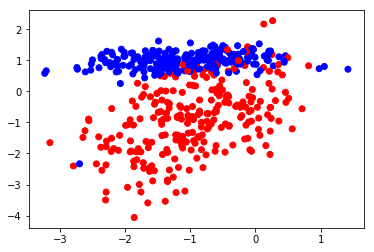

In [81]:
#1. Load data
X = np.genfromtxt('DATA/LinearX.csv', delimiter=',')
y = np.genfromtxt('DATA/LinearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.bwr)
plt.show()

In [82]:
#2. Initialize model
input_dim = np.shape(X)[1]
output_dim = np.max(y) + 1
logreg = LogisticRegression(input_dim, output_dim, 4, L2Reg=0)

In [83]:
# split data into 4 groups, use cross-validation to test overfitting
X_first, X_second, y_first, y_second = train_test_split(X, y,stratify=y,test_size=0.5)
X1, X2, y1, y2 = train_test_split(X_first, y_first, stratify=y_first, test_size=0.5)
X3, X4, y3, y4 = train_test_split(X_second, y_second,stratify=y_second,test_size=0.5)
X1_train=np.concatenate((X2, X3, X4), axis=0)
X2_train=np.concatenate((X1, X3, X4), axis=0)
X3_train=np.concatenate((X1, X2, X4), axis=0)
X4_train=np.concatenate((X1, X2, X3), axis=0)
y1_train=np.concatenate((y2, y3, y4), axis=0)
y2_train=np.concatenate((y1, y3, y4), axis=0)
y3_train=np.concatenate((y1, y2, y4), axis=0)
y4_train=np.concatenate((y1, y2, y3), axis=0)

In [84]:
# a function to compute the accuracy of the model
def accuracy(X, y, model, output_dim):
    acc = 0
    y_pred = model.predict(X)
    con_mat = np.zeros((output_dim, output_dim))
    for i in range(len(y_pred)):
        con_mat[y_pred[i], y[i]] += 1
        if y[i] == y_pred[i]:
            acc += 1
    acc = acc/len(y_pred)
    return acc

In [85]:
# use the concept of cross validation to get the accuracy
acc=0
logreg.fit(X1_train,y1_train,1000,lr=0.001)
acc += accuracy(X1, y1, logreg, output_dim)
logreg.fit(X2_train,y2_train,1000,lr=0.001)
acc += accuracy(X2, y2, logreg, output_dim)
logreg.fit(X3_train,y3_train,1000,lr=0.001)
acc += accuracy(X3, y3, logreg, output_dim)
logreg.fit(X4_train,y4_train,1000,lr=0.001)
acc += accuracy(X4, y4, logreg, output_dim)
acc = acc/4
acc

0.9299999999999999

## NonlinearX and NonlinearY

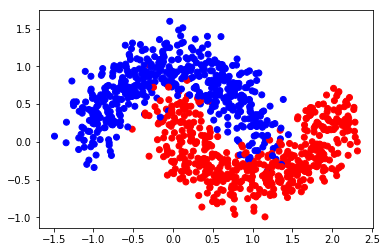

In [94]:
#1. Load data
X_non = np.genfromtxt('DATA/NonlinearX.csv', delimiter=',')
y_non = np.genfromtxt('DATA/NonlinearY.csv', delimiter=',').astype(np.int64)
plt.scatter(X_non[:,0], X_non[:,1], c=y_non, cmap=plt.cm.bwr)
plt.show()

In [98]:
#2. Initialize model
input_dim = np.shape(X_non)[1]
output_dim = np.max(y_non) + 1
logreg = LogisticRegression(input_dim, output_dim, 4, 0.01)

In [99]:
# split data into 4 groups, use cross-validation to test overfitting
X_first, X_second, y_first, y_second = train_test_split(X_non, y_non,stratify=y_non,test_size=0.5)
X1, X2, y1, y2 = train_test_split(X_first, y_first, stratify=y_first, test_size=0.5)
X3, X4, y3, y4 = train_test_split(X_second, y_second,stratify=y_second,test_size=0.5)
X1_train=np.concatenate((X2, X3, X4), axis=0)
X2_train=np.concatenate((X1, X3, X4), axis=0)
X3_train=np.concatenate((X1, X2, X4), axis=0)
X4_train=np.concatenate((X1, X2, X3), axis=0)
y1_train=np.concatenate((y2, y3, y4), axis=0)
y2_train=np.concatenate((y1, y3, y4), axis=0)
y3_train=np.concatenate((y1, y2, y4), axis=0)
y4_train=np.concatenate((y1, y2, y3), axis=0)

In [100]:
# use the concept of cross validation to get the accuracy
acc=0
logreg.fit(X1_train,y1_train,1000,lr=0.001)
acc += accuracy(X1, y1, logreg, output_dim)
logreg.fit(X2_train,y2_train,1000,lr=0.001)
acc += accuracy(X2, y2, logreg, output_dim)
logreg.fit(X3_train,y3_train,1000,lr=0.001)
acc += accuracy(X3, y3, logreg, output_dim)
logreg.fit(X4_train,y4_train,1000,lr=0.001)
acc += accuracy(X4, y4, logreg, output_dim)
acc = acc/4
acc

0.962

### Problem 6
- Overfitting is a modeling error which occurs when a function is too closely fit to a particuar set of data points, and may therefore fail to fit additional data or predict future observations reliably.
- Overfitting occurs when a learning model customizes itself too much to describe the relationship between training data and the labels. It occurs when number of epochs is too high, and parameters (for a neural net it can be the number of nodes in the hidden layers) are too many.
- Ways to reduce overfitting (see credits and bibliography)
    - Use "wrapper" to enumerate models h according to model size (e.g., number of nodes in neural net h). Select model with smallest error.
    - Feature selection: Simplify model by discarding irrelevant attributes (dimensionality reduction).
    - Minimum description length: Select model with smallest number of bits required to encode program and data.

### Problem 7
- Regularization adds a regularization term in order to prevent the coefficients to fit so perfectly to overfit. For L2 regularization, it adds "squared magnitude" of coefficient as penalty term to the loss function, and decreases the change of the weights in each iteration.
- To see how L2 regularization works in our model, we split our dataset into 4 groups, and by using the concept of cross-validation, we use each group as testing data and the rest of it as training data, and get the average accuracy of all four testing data. 
-  As we can see, the average accuracy of testing data slightly increases after applying L2 regularization for both linear and non-linear dataset. The reason the increments are so small is that our datasets are good enough to avoid overfitting. The increment of accuracy would be larger if we use other datasets.